In [13]:
import glob

import numpy as np
import matplotlib.pyplot as plt

In [14]:
sat_dir = '/uio/lagringshotell/geofag/projects/miphclac/hannasv/'

In [15]:
sat_files = glob.glob(sat_dir + "*.grb")

In [16]:
len(sat_files)

93657

In [17]:
sort = np.sort(sat_files)

In [18]:
sort[:3]

array(['/uio/lagringshotell/geofag/projects/miphclac/hannasv/MSG1-SEVI-MSGCLMK-0100-0100-20040402000000.000000000Z-20040402001307-1359298.grb',
       '/uio/lagringshotell/geofag/projects/miphclac/hannasv/MSG1-SEVI-MSGCLMK-0100-0100-20040402010000.000000000Z-20040402011246-1359298.grb',
       '/uio/lagringshotell/geofag/projects/miphclac/hannasv/MSG1-SEVI-MSGCLMK-0100-0100-20040402020000.000000000Z-20040402021246-1359298.grb'],
      dtype='|S133')

In [19]:
def timestamp(filename):
    """
    Returns the numpy datetime 64 [ns] for the current date.
    This is a bit hardcoded at the moment ....
    """
    splits = filename.split('-')
    ts = splits[5]
    year = ts[:4]
    month = ts[4:6]
    day = ts[6:8]
    hr = ts[8:10]
    minuts = ts[10:12]
    sek = ts[12:14]
    # TODO make sure all filenames have seconds
    return np.datetime64( year+"-"+month+"-"+day+"T"+hr ) # +":"+minuts+":"+sek

In [20]:
all_ts = []

for fil in sort:
    all_ts.append(timestamp(fil))

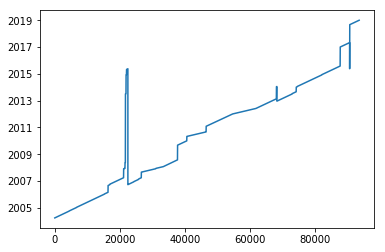

In [21]:
plt.plot(all_ts)
plt.show()

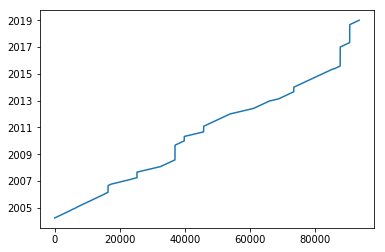

In [22]:
ll = np.sort(all_ts)
plt.plot(ll)
plt.show()

# Print times that are missing


In [23]:
all_ = np.arange('2004-04-02T00:00:00', '2019-01-01T00:00:00', dtype='datetime64[h]')

In [24]:
missing = []
for ts in all_:
    if ts not in ll:
        missing.append(ts)

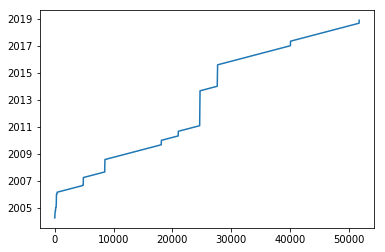

In [27]:
plt.plot(missing)

In [51]:
single = []
period = []

for i in range(len(missing)-1):
    if i == 0:
        diff = (missing[i+1] - missing[i]).astype(int)
        if diff == 1:
            serie = True
            series_str = "{}".format(missing[i]) # add last one later 
        else:
            serie = False
            single.append(missing[i])
    else: 
        if serie:
            diff_f = (missing[i+1] - missing[i]).astype(int)
            #diff_b = (missing[i] - missing[i-1]).astype(int)
            #print(diff_f)
            #print(diff_b)
            if diff_f == 1: # == diff_b 
                # part of serie --> don't store.
                serie = True
                #print('never enters')
            else:
                # Slutten på en serie.
                serie = False
                series_str += "-{}".format(missing[i])
                period.append(series_str)
        else:
            # Sjekk om det er begynnelsen på en serie.
            diff = (missing[i+1] - missing[i]).astype(int)
            if diff == 1:
                serie = True
                series_str = "{}".format(missing[i]) # add last one later 
            else:
                serie = False
                single.append(missing[i])

single.append(missing[-1])

In [52]:
single

[numpy.datetime64('2004-04-07T12','h'),
 numpy.datetime64('2004-04-08T15','h'),
 numpy.datetime64('2004-04-28T21','h'),
 numpy.datetime64('2004-05-03T11','h'),
 numpy.datetime64('2004-05-06T15','h'),
 numpy.datetime64('2004-05-08T10','h'),
 numpy.datetime64('2004-05-08T19','h'),
 numpy.datetime64('2004-05-10T08','h'),
 numpy.datetime64('2004-05-11T15','h'),
 numpy.datetime64('2004-06-08T12','h'),
 numpy.datetime64('2004-06-17T08','h'),
 numpy.datetime64('2004-06-17T14','h'),
 numpy.datetime64('2004-06-17T17','h'),
 numpy.datetime64('2004-06-30T09','h'),
 numpy.datetime64('2004-07-18T13','h'),
 numpy.datetime64('2004-07-20T15','h'),
 numpy.datetime64('2004-07-23T18','h'),
 numpy.datetime64('2004-07-27T22','h'),
 numpy.datetime64('2004-08-17T11','h'),
 numpy.datetime64('2004-08-20T08','h'),
 numpy.datetime64('2004-08-23T19','h'),
 numpy.datetime64('2004-10-12T22','h'),
 numpy.datetime64('2004-10-13T08','h'),
 numpy.datetime64('2004-11-03T09','h'),
 numpy.datetime64('2004-11-16T19','h'),


In [53]:
period

['2004-04-07T02-2004-04-07T07',
 '2004-05-08T12-2004-05-08T16',
 '2004-06-14T12-2004-06-14T13',
 '2004-06-23T05-2004-06-23T06',
 '2004-08-26T02-2004-08-26T03',
 '2004-09-29T01-2004-09-29T02',
 '2004-10-04T07-2004-10-07T10',
 '2004-11-08T13-2004-11-08T14',
 '2004-12-03T02-2004-12-03T04',
 '2004-12-08T06-2004-12-08T07',
 '2004-12-16T14-2004-12-16T15',
 '2005-01-10T13-2005-01-14T10',
 '2005-02-03T17-2005-02-03T18',
 '2005-03-06T12-2005-03-06T14',
 '2005-03-06T16-2005-03-06T17',
 '2005-03-15T11-2005-03-15T12',
 '2005-04-18T03-2005-04-18T13',
 '2005-05-27T00-2005-05-27T03',
 '2005-05-27T16-2005-05-27T17',
 '2005-06-20T12-2005-06-20T13',
 '2005-06-20T19-2005-06-20T21',
 '2005-09-14T12-2005-09-14T13',
 '2006-01-09T13-2006-01-13T08',
 '2006-03-01T00-2006-08-31T23',
 '2006-09-04T13-2006-09-04T15',
 '2006-09-23T14-2006-09-25T06',
 '2007-03-07T00-2007-03-07T01',
 '2007-03-10T06-2007-03-10T08',
 '2007-04-02T00-2007-08-31T23',
 '2007-11-17T06-2007-11-17T08',
 '2007-11-19T06-2007-11-19T07',
 '2008-0

# OLD 

In [101]:
tot = np.arange('2004-04-02T00:00:00', '2019-01-01T00:00:00', dtype='datetime64[h]')
ll = np.sort(all_ts)

period = []
missing_periods = []
missing_singles = []

j=0
i = 0

while j < len(tot) and i < len(ll):
    #exp_ts = 
    period = (ll[i] - tot[j]).astype(int)
    #len_period = diff.astype(int)
    if period == 0:
        print("only updates values")
        j+=1
        i+=1
    else:
        #print(" Detected singles {} for len {}".format( exp_ts , len_period ))
        
        if np.abs(len_period) > 1:
            print(" Detected new period {}".format(tuple( (tot[j] , tot[j+np.abs(len_period)]) )))
            missing_dates.append( tuple( (tot[j] , tot[j+np.abs(len_period)]) ))
            j = j+np.abs(len_period)
        else:        
            missing_singles.append(exp_ts)
            j+=1

    i += 1    
    #print(" Index_true = {} j = {}".format(index_true, j))


only updates values


In [102]:
missing_dates

[(numpy.datetime64('2004-04-02T00','h'),
  numpy.datetime64('2004-04-02T00','h')),
 (numpy.datetime64('2004-04-02T00','h'),
  numpy.datetime64('2004-04-02T00','h')),
 (numpy.datetime64('2004-04-02T00','h'),
  numpy.datetime64('2004-04-02T00','h')),
 (numpy.datetime64('2004-04-02T00','h'),
  numpy.datetime64('2004-04-02T00','h')),
 (numpy.datetime64('2004-04-02T00','h'),
  numpy.datetime64('2004-04-02T00','h')),
 (numpy.datetime64('2004-04-02T00','h'),
  numpy.datetime64('2004-04-02T00','h')),
 (numpy.datetime64('2004-04-02T00','h'),
  numpy.datetime64('2004-04-02T00','h')),
 (numpy.datetime64('2004-04-02T00','h'),
  numpy.datetime64('2004-04-02T00','h')),
 (numpy.datetime64('2004-04-02T00','h'),
  numpy.datetime64('2004-04-02T00','h')),
 (numpy.datetime64('2004-04-02T00','h'),
  numpy.datetime64('2004-04-02T00','h')),
 (numpy.datetime64('2004-04-02T00','h'),
  numpy.datetime64('2004-04-02T00','h')),
 (numpy.datetime64('2004-04-02T00','h'),
  numpy.datetime64('2004-04-02T00','h')),
 (nu

In [103]:
missing_singles

[numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),
 numpy.datetime64('2004-04-02T00','h'),


In [104]:
expected_ts = np.arange('2004-04-02T00:00:00', '2018-12-31T23:00:00', dtype='datetime64[h]')

In [21]:
expected_ts[:10]

array(['2004-04-02T00', '2004-04-02T01', '2004-04-02T02', '2004-04-02T03',
       '2004-04-02T04', '2004-04-02T05', '2004-04-02T06', '2004-04-02T07',
       '2004-04-02T08', '2004-04-02T09'], dtype='datetime64[h]')

In [ ]:
for start, stop, length in zip(period_start, period_stop, length_of_periods):
    print("{}-{}, number of hours {}".format(start, stop, length ))

In [ ]:


for i, this_hr in enumerate(ll):
    next_hr = this_hr + np.timedelta64(1, 'h')
    prev_hr = this_hr - np.timedelta64(1, 'h')
    
    if 
    
    if i < len(ll)-1: # IF NOT LAST
        
        # test if its a part of a sequence
        
        
        # if not add to the sigle array 
        if ll[i+1] != next_hr:
            missing.append(next_hr)

In [ ]:
len(missing)

In [ ]:
plt.plot(missing)

In [ ]:
missing[:100]

In [ ]:
missing[100:200]

In [ ]:
missing[200:300]

In [ ]:
missing[400:600]

In [ ]:
missing[600:800]

In [ ]:
missing[800:1000]

In [ ]:
missing[1200:1400]

In [ ]:
missing[2200:2800]

In [ ]:
missing[3600:4200]

In [ ]:
import xarray as xr

In [ ]:
filll = '/uio/lagringshotell/geofag/students/metos/hannasv/satelite_data/*.nc'

In [ ]:
files = glob.glob(filll)

In [ ]:
for fil in files:
    print(xr.open_dataset(fil))